# DATA VISUALIZATION ASSIGNMENT


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Loading dataset using pandas syntax

df = pd.read_csv("Health_heart_experimental.csv")


### Line Chart

C:\Users\nixan\AppData\Local\Temp\ipykernel_19080\3313390146.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_hr = df.groupby('age_group')['HR'].mean()


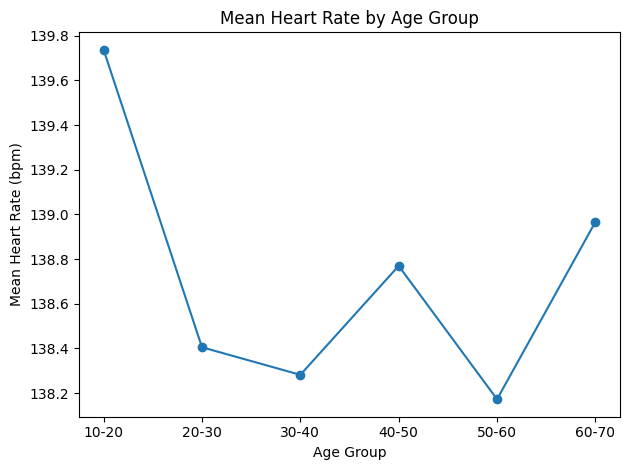

In [3]:


bins = [0,10,20,30,40,50,60,70,80,90,100]

# Labeling for different age groups
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

# New column for the binned age
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calculating mean HR for each age group 
mean_hr = df.groupby('age_group')['HR'].mean()

plt.plot(mean_hr.index, mean_hr.values, marker='o')
plt.xlabel("Age Group")
plt.ylabel("Mean Heart Rate (bpm)")
plt.title("Mean Heart Rate by Age Group")
plt.tight_layout()
plt.show()


###### This line plot shows that Heart Rate generally drops till middle age and then rises a very little further in the old age 

### Bar Plot

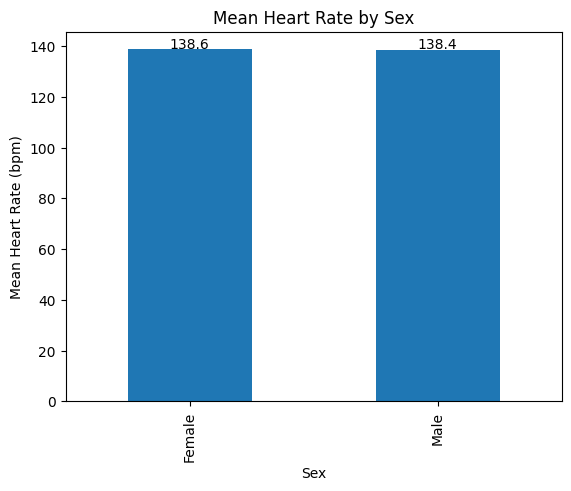

In [4]:
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

# Calculating mean HR by sex
mean_hr = df.groupby('sex')['HR'].mean()

# bar plot
ax = mean_hr.plot(kind='bar')

plt.xlabel("Sex")
plt.ylabel("Mean Heart Rate (bpm)")
plt.title("Mean Heart Rate by Sex")

# mean HR values on top of each bar
for i, v in enumerate(mean_hr.values):
    ax.text(i, v + 0.5, f"{v:.1f}", ha='center')

plt.show()


###### This bar shows that the Heart Rate (bpm) of both male and female is almost identical

### Pie Chart

<Axes: ylabel='count'>

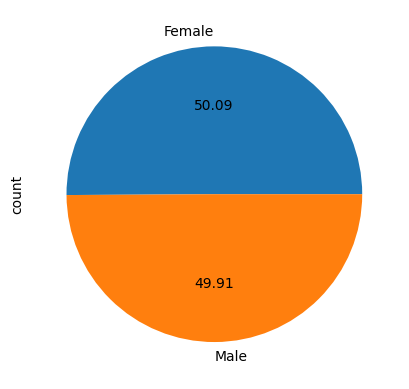

In [5]:
df['sex'].map({0: 'Female', 1: 'Male'}).value_counts().plot(kind='pie', autopct='%0.2f')

###### Here we get to see that the health experiment was conducted on almost equal numbers of male and female

### Box Plot

<Axes: ylabel='age'>

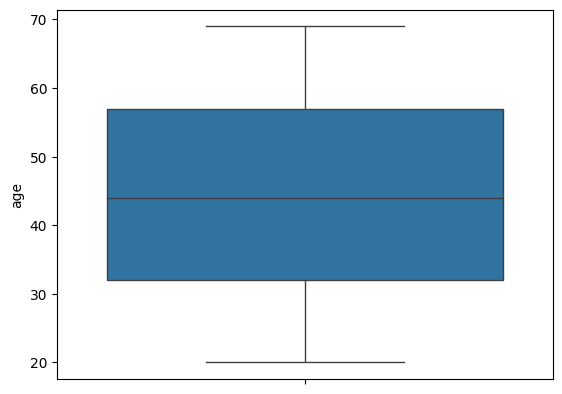

In [6]:
sns.boxplot(y='age',data=df)

###### The experiment included participants aged 20 to 69, with the majority (interquartile range) between approximately 32 and 56 years old. The median age was 44, indicating that the average participant was in their mid-40s

### Histogram

(array([13297., 10347., 10809.,  8049.,  7033.,  6900.,  4912.,  4688.,
         3188.,  2537.]),
 array([ 45. ,  52.4,  59.8,  67.2,  74.6,  82. ,  89.4,  96.8, 104.2,
        111.6, 119. ]),
 <BarContainer object of 10 artists>)

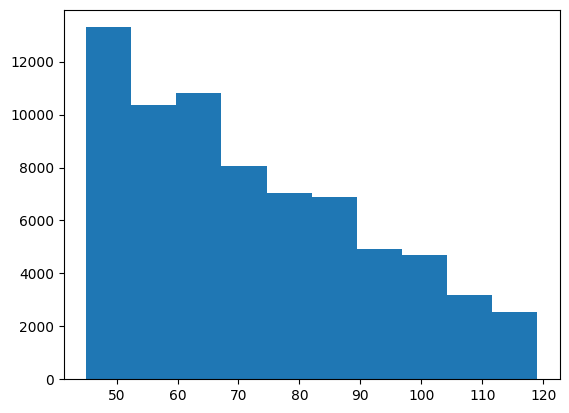

In [7]:
plt.hist(df['weightKg'])

###### This histogram has skew right nature

(array([  781.,  2128.,  3594.,  4286.,  6456.,  8058.,  8560., 11382.,
        13276., 13239.]),
 array([107. , 114.7, 122.4, 130.1, 137.8, 145.5, 153.2, 160.9, 168.6,
        176.3, 184. ]),
 <BarContainer object of 10 artists>)

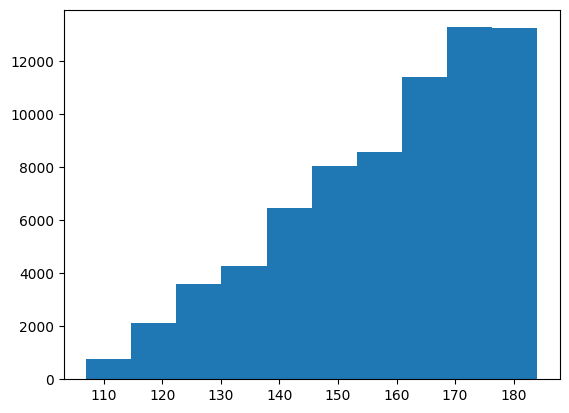

In [8]:
plt.hist(df['heightCm'])

###### This histogram has skew left nature

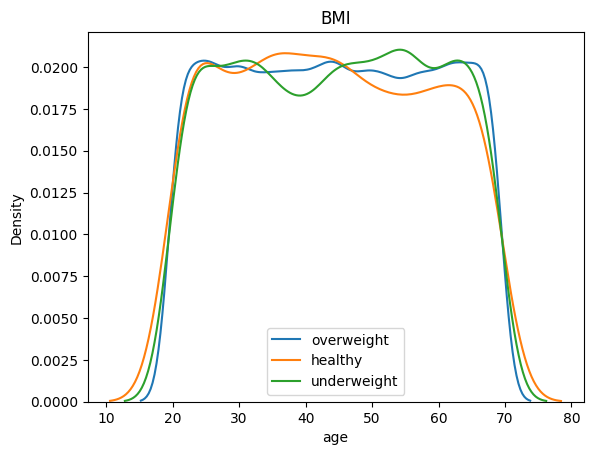

In [9]:
sns.kdeplot(df[df['BMI'] >20]['age'], label='overweight')
sns.kdeplot(df[df['BMI'] ==20]['age'], label='healthy')
sns.kdeplot(df[df['BMI'] <20]['age'], label='underweight')

plt.title('BMI')
plt.xlabel('age')
plt.ylabel('Density')
plt.legend()
plt.show()

###### This plot shows that BMI of people under 20 is generally low and then it remains flat for people between 20 and 65. After 65, it drops again sharply. It also reveals that people of all ages can be overweight or healthy or underweight as there is no correlation of it to ages of people

### Scatter Plot

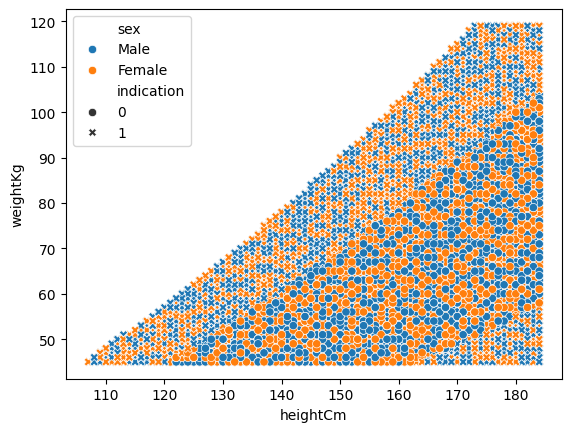

In [10]:
sns.scatterplot(x='heightCm', y='weightKg',hue='sex', style='indication',data=df)
plt.show()

###### This plot reveals us that weight is directly related to height. So generally weight of a person increases along with height 